## Multimodal Emotion Recognition - Full system

### FileProcessor

In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas(desc="Processing...")
import sys
import os
# insert the path to the source code directory
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)



In [2]:
import kagglehub

# Download dataset
file_path = kagglehub.dataset_download("bhandariprakanda/meld-emotion-recognition")
# Check subfolders
print("Subfolders in the dataset:", os.listdir(file_path))
raw_path = os.path.join(file_path, "MELD.Raw", "MELD.Raw", "test", "output_repeated_splits_test")
files = os.listdir(raw_path)
# scan the directory 
print("Subfolders in the raw data:", files)
# create dataframe with the files
filenames = [os.path.join(raw_path, file) for file in files]
len(filenames)


/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Subfolders in the dataset: ['JSON files', 'MELD.Raw']
Subfolders in the raw data: ['dia47_utt11.mp4', 'dia35_utt2.mp4', 'dia47_utt9.mp4', 'dia167_utt14.mp4', 'dia232_utt4.mp4', '._dia118_utt11.mp4', 'dia34_utt2.mp4', 'dia268_utt8.mp4', 'dia233_utt4.mp4', '._dia39_utt1.mp4', '._dia230_utt3.mp4', 'dia137_utt0.mp4', '._dia268_utt11.mp4', '._dia231_utt3.mp4', 'dia136_utt0.mp4', '._dia38_utt1.mp4', '._dia34_utt16.mp4', '._dia128_utt2.mp4', 'dia28_utt7.mp4', 'dia195_utt8.mp4', 'dia22_utt15.mp4', '._dia129_utt2.mp4', '._dia100_utt5.mp4', 'dia29_utt7.mp4', 'dia103_utt2.mp4', 'final_videos_testdia48_utt3.mp4', 'dia154_utt12.mp4', '._dia95_utt11.mp4', '._dia205_utt1.mp4', 'dia102_utt2.mp4', 'dia107_utt8.mp4', 'dia253_utt11.mp4', '._dia52_utt5.mp4', 'dia175_utt3.mp4', 'dia93_utt0.mp4', '._dia272_utt0.mp4', '._dia192_utt5.mp4', 'dia174_utt3.mp4', '._dia53_utt5.mp4', 'dia175_utt13.mp4', 'dia92_utt0.mp4', 'dia191_utt2.mp4', 'dia77_utt1.mp4', 'dia259_utt0.mp4', 'dia270_utt7.mp4', 'dia123_utt11.mp4', 

4807

In [3]:
labels_path = os.path.join(file_path, "MELD.Raw", "MELD.Raw", "test_sent_emo.csv")
# Load the labels CSV file
labels_df = pd.read_csv(labels_path)
labels_df['filename'] = labels_df[['Dialogue_ID', 'Utterance_ID']].apply(
    lambda x: os.path.join(raw_path, f"dia{x['Dialogue_ID']}_utt{x['Utterance_ID']}.mp4"), axis=1
    )
labels_df.tail()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename
2605,2760,"Yeah, I mean, come on Ross, no one will even n...",Rachel,neutral,neutral,279,11,6,4,"00:14:35,457","00:14:40,211",/Users/sofiafernandes/.cache/kagglehub/dataset...
2606,2761,They’re not listening too me?,Ross,surprise,negative,279,12,6,4,"00:14:42,256","00:14:43,840",/Users/sofiafernandes/.cache/kagglehub/dataset...
2607,2762,Of course they’re listening to you! Everybody ...,Rachel,neutral,neutral,279,13,6,4,"00:14:44,008","00:14:48,511",/Users/sofiafernandes/.cache/kagglehub/dataset...
2608,2763,Monica you really think I should try this phas...,Ross,neutral,neutral,279,14,6,4,"00:14:48,138","00:14:52,390",/Users/sofiafernandes/.cache/kagglehub/dataset...
2609,2764,I think you look fine.,Monica,neutral,neutral,279,15,6,4,"00:14:52,558","00:14:54,183",/Users/sofiafernandes/.cache/kagglehub/dataset...


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="Processing...")
from src.assistant import EmotionRecognitionAssistant
df = labels_df.sample(100)  # Sample 100 rows for testing
assistant = EmotionRecognitionAssistant()
#print(assistant.analyze(os.path.join(raw_path, "dia47_utt11.mp4")))
df['preds'] = df['filename'].progress_apply(assistant.analyze)

In [11]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,preds,audio_preds,text_preds,label
676,725,We just want you to think it through.,Monica,neutral,neutral,74,2,4,11,"00:05:06,889","00:05:08,390",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' We just w...,neutral,neutral,neutral
2511,2663,"Aw come on Joey, it's easy.",Director,neutral,neutral,267,6,3,12,"00:15:15,915","00:15:17,248",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Enjoy, co...",neutral,neutral,neutral
2034,2159,Monica and Rachel made out.,Joey,neutral,neutral,216,3,4,19,"00:21:20,570","00:21:22,613",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Planting ...,happy,surprise,neutral
2237,2379,I-I-Im leaving the show?,Cecilia,surprise,negative,240,12,7,15,"00:05:30,204","00:05:33,415",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' I was won...,angry,neutral,surprise
1975,2090,"Chandler, we said we would meet at the coffeeh...",Monica,anger,negative,210,0,6,21,"00:17:06,442","00:17:09,444",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' We said w...,angry,neutral,angry


In [22]:
df.iloc[3].preds

{'text_emotion': {'transcription': " I was wondering if there's any tips. You could give me. I'm leaving the show.",
  'emotion': 'neutral'},
 'audio_emotion': {'emotions': ['angry']},
 'face_emotion': [{'emotions': {'angry': 50.239291801410424,
    'disgust': 0.0003354308746409495,
    'fear': 5.699999970197676,
    'happy': 0.0012677852128814009,
    'sad': 34.52021089316671,
    'surprise': 0.06718167387845658,
    'neutral': 9.47171506117076},
   'dominant_emotion': 'angry'},
  {'emotions': {'angry': 0.10427913551578734,
    'disgust': 3.1750681755539906e-07,
    'fear': 0.7436785824554314,
    'happy': 0.182770436347749,
    'sad': 0.061986837738340364,
    'surprise': 97.1520064563755,
    'neutral': 1.7552773583100651},
   'dominant_emotion': 'surprise'},
  {'error': 'Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.'}]}

In [23]:
df['audio_preds'] = df['preds'].progress_apply(lambda x: x['audio_emotion']['emotions'][0])
df['text_preds'] = df['preds'].progress_apply(lambda x: x['text_emotion']['emotion'] if 'text_emotion' in x.keys() else None)
df['face_preds'] = df['preds'].progress_apply(lambda x: [i['dominant_emotion']for i in x['face_emotion'] if 'dominant_emotion' in i.keys()] if 'face_emotion' in x.keys() else 'no face detected')
df.head()


Processing...: 100%|██████████| 100/100 [00:00<00:00, 58587.85it/s]


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,preds,audio_preds,text_preds,label,face_preds
676,725,We just want you to think it through.,Monica,neutral,neutral,74,2,4,11,"00:05:06,889","00:05:08,390",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' We just w...,neutral,neutral,neutral,"[happy, neutral]"
2511,2663,"Aw come on Joey, it's easy.",Director,neutral,neutral,267,6,3,12,"00:15:15,915","00:15:17,248",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Enjoy, co...",neutral,neutral,neutral,no face detected
2034,2159,Monica and Rachel made out.,Joey,neutral,neutral,216,3,4,19,"00:21:20,570","00:21:22,613",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Planting ...,happy,surprise,neutral,no face detected
2237,2379,I-I-Im leaving the show?,Cecilia,surprise,negative,240,12,7,15,"00:05:30,204","00:05:33,415",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' I was won...,angry,neutral,surprise,"[angry, surprise]"
1975,2090,"Chandler, we said we would meet at the coffeeh...",Monica,anger,negative,210,0,6,21,"00:17:06,442","00:17:09,444",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' We said w...,angry,neutral,angry,"[fear, fear]"


In [31]:
df.to_csv('meld_predictions.csv', index=False)

In [32]:
#df = df.dropna(subset=['audio_preds', 'text_preds'])
df = pd.read_csv('meld_predictions.csv')
df.face_preds.value_counts()

face_preds
no face detected                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [27]:
# function to choose the most frequent emotion or 'other' if no emotion is detected
def choose_most_frequent(emotions):
    if not emotions or 'no face detected' in emotions:
        return 'other'
    else:
        return max(set(emotions), key=emotions.count)
    
df['face_pred'] = df['face_preds'].progress_apply(choose_most_frequent)
df.head()

Processing...: 100%|██████████| 100/100 [00:00<00:00, 67748.41it/s]


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,preds,audio_preds,text_preds,label,face_preds,face_pred
676,725,We just want you to think it through.,Monica,neutral,neutral,74,2,4,11,"00:05:06,889","00:05:08,390",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' We just w...,neutral,neutral,neutral,"[happy, neutral]",neutral
2511,2663,"Aw come on Joey, it's easy.",Director,neutral,neutral,267,6,3,12,"00:15:15,915","00:15:17,248",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Enjoy, co...",neutral,neutral,neutral,no face detected,other
2034,2159,Monica and Rachel made out.,Joey,neutral,neutral,216,3,4,19,"00:21:20,570","00:21:22,613",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Planting ...,happy,surprise,neutral,no face detected,other
2237,2379,I-I-Im leaving the show?,Cecilia,surprise,negative,240,12,7,15,"00:05:30,204","00:05:33,415",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' I was won...,angry,neutral,surprise,"[angry, surprise]",angry
1975,2090,"Chandler, we said we would meet at the coffeeh...",Monica,anger,negative,210,0,6,21,"00:17:06,442","00:17:09,444",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' We said w...,angry,neutral,angry,"[fear, fear]",fear


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
map_labels = {
    'neutral': 'neutral',
    'sadness': 'sad',
    'anger': 'angry',
    'joy': 'happy',
    'surprise': 'surprise',
    'fear': 'fear',
    'disgust': 'disgust',
    "happy": 'happy',
    "angry": 'angry',
    "sad": 'sad',
}
df['label'] = df['Emotion'].map(map_labels) 
df['text_preds'] = df['text_preds'].map(lambda x: map_labels.get(x, 'other'))
#df['preds_audio1'] = df['preds_audio2'].progress_apply(lambda x: x['emotions'][0])
print(classification_report(df['label'], df['text_preds']))
print(confusion_matrix(df['label'], df['text_preds']))

              precision    recall  f1-score   support

       angry       0.75      0.21      0.33        14
     disgust       0.00      0.00      0.00         4
        fear       0.00      0.00      0.00         4
       happy       0.45      0.43      0.44        21
     neutral       0.54      0.59      0.56        46
       other       0.00      0.00      0.00         0
         sad       0.20      0.33      0.25         3
    surprise       0.11      0.12      0.12         8

    accuracy                           0.41       100
   macro avg       0.26      0.21      0.21       100
weighted avg       0.46      0.41      0.41       100

[[ 3  0  0  0  6  2  2  1]
 [ 0  0  1  1  0  0  0  2]
 [ 0  0  0  0  2  2  0  0]
 [ 0  0  0  9  8  3  0  1]
 [ 1  1  1 10 27  1  2  3]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  1]
 [ 0  0  0  0  6  1  0  1]]


In [29]:
print(classification_report(df['label'], df['audio_preds']))
print(confusion_matrix(df['label'], df['audio_preds']))

              precision    recall  f1-score   support

       angry       0.19      0.93      0.31        14
     disgust       0.00      0.00      0.00         4
        fear       0.00      0.00      0.00         4
       happy       0.00      0.00      0.00        21
     neutral       0.74      0.43      0.55        46
         sad       0.00      0.00      0.00         3
    surprise       0.00      0.00      0.00         8

    accuracy                           0.33       100
   macro avg       0.13      0.19      0.12       100
weighted avg       0.37      0.33      0.30       100

[[13  0  0  0  1  0  0]
 [ 4  0  0  0  0  0  0]
 [ 3  0  0  0  1  0  0]
 [16  0  0  0  4  1  0]
 [24  0  0  2 20  0  0]
 [ 1  0  0  1  1  0  0]
 [ 8  0  0  0  0  0  0]]


In [30]:
print(classification_report(df['label'], df['face_pred']))
print(confusion_matrix(df['label'], df['face_pred']))

              precision    recall  f1-score   support

       angry       0.17      0.29      0.21        14
     disgust       0.00      0.00      0.00         4
        fear       0.07      0.25      0.11         4
       happy       0.29      0.10      0.14        21
     neutral       0.52      0.24      0.33        46
       other       0.00      0.00      0.00         0
         sad       0.00      0.00      0.00         3
    surprise       0.00      0.00      0.00         8

    accuracy                           0.18       100
   macro avg       0.13      0.11      0.10       100
weighted avg       0.33      0.18      0.21       100

[[ 4  0  4  1  2  2  1  0]
 [ 1  0  1  1  1  0  0  0]
 [ 1  0  1  0  1  0  1  0]
 [ 5  0  2  2  4  6  2  0]
 [ 9  0  4  2 11 10 10  0]
 [ 0  0  0  0  0  0  0  0]
 [ 1  0  1  0  1  0  0  0]
 [ 3  0  2  1  1  1  0  0]]


In [17]:
df[df['label'] == df['text_preds']]

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,preds,audio_preds,text_preds,label
676,725,We just want you to think it through.,Monica,neutral,neutral,74,2,4,11,"00:05:06,889","00:05:08,390",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' We just w...,neutral,neutral,neutral
2511,2663,"Aw come on Joey, it's easy.",Director,neutral,neutral,267,6,3,12,"00:15:15,915","00:15:17,248",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Enjoy, co...",neutral,neutral,neutral
662,710,OH .MY .GAWD!!!,Woman,surprise,positive,72,16,8,23,"00:20:01,146","00:20:06,568",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Oh, my Go...",angry,surprise,surprise
950,1009,Not at these prices.,Monica,anger,negative,108,4,3,7,"00:05:01,884","00:05:04,052",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Not at th...,angry,angry,angry
1785,1884,All right!,Joey,joy,positive,189,0,4,23,"00:06:39,982","00:06:41,817",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' All right...,neutral,happy,happy
1469,1537,There you go sweetie... This isn't over.,Joey,neutral,neutral,157,7,9,17,"00:06:25,456","00:06:31,504",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Okay, the...",neutral,neutral,neutral
1866,1968,"Can-can I get your autograph, Im your biggest...",The Fan,joy,positive,197,4,6,14,"00:05:58,816","00:06:01,693",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Can I get...,angry,happy,happy
1329,1396,All right.,Chandler,neutral,neutral,142,1,3,6,"00:04:39,654","00:04:40,862",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' All right...,angry,neutral,neutral
2273,2417,Hey.,Chandler,neutral,neutral,244,2,3,6,"0:02:36,447","0:02:36,823",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Hey!', 'e...",neutral,neutral,neutral
2062,2187,Im so exited!,Rachel,joy,positive,222,3,4,18,"0:05:46,238","0:05:48,645",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' You're so...,angry,happy,happy


In [18]:
df.text_preds.value_counts()

text_preds
neutral     50
happy       20
surprise     9
other        9
sad          5
angry        4
fear         2
disgust      1
Name: count, dtype: int64

In [ ]:
from src.processor import FileProcessor
from src.recognizers import SpeechEmotionRecognizer
# Initialize the FileProcessor
processor = FileProcessor()
# Initialize the SpeechEmotionRecognizer
recognizer = SpeechEmotionRecognizer()
# Define the file path to the audio file

In [ ]:
from src.assistant import EmotionRecognitionAssistant

from tqdm import tqdm
assistant = EmotionRecognitionAssistant()
#processor = FileProcessor()
# Process a few files from the dataset
paths = labels_df['path'].tolist()[:10]
for path in tqdm(paths):
    full_path = os.path.join(file_path, "IEMOCAP_full_release", path)
    print(f"Processing file: {full_path}")
    result = assistant.analyze(full_path)
    #result = processor.process_file(full_path)
    print(result)


  0%|          | 0/10 [00:00<?, ?it/s]

Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F000.wav


 10%|█         | 1/10 [00:18<02:43, 18.21s/it]

{'text_emotion': {'transcription': ' Come on.', 'emotion': 'happy'}, 'audio_emotion': {'emotions': ['fear']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F001.wav


 20%|██        | 2/10 [00:21<01:13,  9.18s/it]

{'audio_emotion': {'emotions': ['sad']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F002.wav


 30%|███       | 3/10 [00:26<00:50,  7.28s/it]

{'text_emotion': {'transcription': ' What?', 'emotion': 'surprise'}, 'audio_emotion': {'emotions': ['happy']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F003.wav


 40%|████      | 4/10 [00:30<00:37,  6.30s/it]

{'text_emotion': {'transcription': " We're flashlight", 'emotion': 'Happy'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F004.wav


 50%|█████     | 5/10 [00:36<00:30,  6.02s/it]

{'text_emotion': {'transcription': " That's not your flashlight.", 'emotion': 'anger'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F005.wav


 60%|██████    | 6/10 [00:41<00:23,  5.87s/it]

{'text_emotion': {'transcription': " It's hours, it's my flashlight too.", 'emotion': 'fear'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F006.wav


 70%|███████   | 7/10 [00:48<00:17,  6.00s/it]

{'text_emotion': {'transcription': " You keep saying my flashlight, like it's just yours.", 'emotion': 'angry'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F007.wav


 80%|████████  | 8/10 [00:54<00:12,  6.00s/it]

{'text_emotion': {'transcription': " How's that supposed to make me feel?", 'emotion': 'angry'}, 'audio_emotion': {'emotions': ['happy']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F008.wav


 90%|█████████ | 9/10 [00:59<00:05,  5.88s/it]

{'text_emotion': {'transcription': ' Yeah', 'emotion': 'Surprised.'}, 'audio_emotion': {'emotions': ['sad']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F009.wav


100%|██████████| 10/10 [01:12<00:00,  7.29s/it]

{'text_emotion': {'transcription': " Y'know.", 'emotion': 'no emotion'}, 'audio_emotion': {'emotions': ['fear']}}


In [45]:
import os
import tempfile
import cv2
import whisper #pip install git+https://github.com/openai/whisper.git
import librosa
from PyPDF2 import PdfReader
from docx import Document
from moviepy.editor import VideoFileClip
from PIL import Image


class FileProcessor:
    def __init__(self):
        self.file_types = {
            'text': ['txt', 'pdf', 'docx'],
            'audio': ['mp3', 'wav', 'sph'],
            'image': ['jpg', 'jpeg', 'png'],
            'video': ['mp4', 'avi', 'mov', 'webm']
        }
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.transcriber = whisper.load_model("base") 

    def process_file(self, file_path):
        """Main processing method"""
        if not os.path.isfile(file_path):
            return {"error": "File not found"}

        file_type = self._detect_file_type(file_path)

        try:
            if file_type == 'text':
                return self._process_text(file_path)
            elif file_type == 'audio':
                return self._process_audio(file_path)
            elif file_type == 'image':
                return self._process_image(file_path)
            elif file_type == 'video':
                return self._process_video(file_path)
            else:
                return {"error": "Unsupported file type"}
        except Exception as e:
            return {"error": str(e)}

    def _detect_file_type(self, file_path):
        """Detect file type category"""
        ext = file_path.split('.')[-1].lower()
        for category, extensions in self.file_types.items():
            if ext in extensions:
                return category
        return 'unknown'

    def _process_text(self, file_path):
        """Process text-based files"""
        ext = file_path.split('.')[-1].lower()
        text = ''

        if ext == 'txt':
            with open(file_path, 'r') as f:
                text = f.read()
        elif ext == 'pdf':
            with open(file_path, 'rb') as f:
                reader = PdfReader(f)
                text = '\n'.join([page.extract_text() for page in reader.pages])
        elif ext == 'docx':
            doc = Document(file_path)
            text = '\n'.join([para.text for para in doc.paragraphs])

        return {"text": text}

    def _process_audio(self, file_path, chunk_duration=3, hop_duration=1):
        """Load audio files and transcribe them"""
        audio, sr = librosa.load(file_path, sr=16000)
        transcript = self.transcriber.transcribe(audio)
        segments = transcript['segments']
        audio_chunks = [audio[int(seg['start'] * sr):int(seg['end'] * sr)] for seg in segments]

        return {
            "text": transcript['text'],
            "segments": segments,
            "audio": {
                "raw": audio,
                "audio_chunks": audio_chunks,
                "sample_rate": sr,
            }
        }


    def _process_image(self, file_path):
        """Process image files with face detection"""
        img = cv2.imread(file_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
        if len(faces) > 0:
            x, y, w, h = faces[0]
            face_img = img[y:y+h, x:x+w]
            pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
        else:
            pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        return {"image": pil_image}

    def _process_video(self, file_path):
        """Process video files with frame extraction and audio processing"""
        result = {}
        with tempfile.NamedTemporaryFile(suffix='.wav') as tmpfile:
            video = VideoFileClip(file_path)
            if video.audio:
                video.audio.write_audiofile(tmpfile.name)
                audio_result = self._process_audio(tmpfile.name)
                result.update(audio_result)
            else:
                result["audio"] = None
                result["text"] = None

        cap = cv2.VideoCapture(file_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_interval = int(fps * 1)  # Every 1 second
        frame_count = 0
        frames = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            if frame_count % frame_interval == 0:
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
                if len(faces) > 0:
                    x, y, w, h = faces[0]
                    face_img = frame[y:y+h, x:x+w]
                    pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
                    frames.append(pil_image)

            frame_count += 1

        cap.release()
        result["frames"] = frames
        return result

processor = FileProcessor()

In [46]:
#filename = emodb['filename'].to_list()[1]
filename = crema['filename'].to_list()[0]
#filename ="/Users/sofiafernandes/Documents/Repos/MEIM-ano1-sem2/TFM-SC/01-01-05-02-02-01-01.mp4"
#filename = "/Users/sofiafernandes/Documents/Repos/MEIM-ano1-sem2/TFM-SC/Ses01F_impro01.avi"
result = processor.process_file(filename)
print(result['text'])

 I think I've seen this before.


In [29]:
result['audio']['audio_chunks'][1]

array([0.01741896, 0.01392634, 0.00778588, ..., 0.00131959, 0.00121908,
       0.00037531], dtype=float32)

In [47]:
import pickle
from joblib import dump, load
import opensmile

class SpeechEmotionRecognizer:
    def __init__(self, model_path='/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/notebooks/speech/ser_svm_model3.joblib'):
        try:
            with open(model_path, 'rb') as file:
                #self.model = pickle.load(file)
                self.model = load(file)
        except FileNotFoundError:
            self.model = None
            print(f"Warning: Speech emotion recognizer model not found at {model_path}")
        except Exception as e:
            self.model = None
            print(f"Error loading speech emotion recognizer: {e}")

    def extract_features(self, audio, sr):
        smile = opensmile.Smile(
            feature_set=opensmile.FeatureSet.GeMAPSv01b,
            feature_level=opensmile.FeatureLevel.Functionals,
        )
        features = smile.process_signal(audio, sr)
        return features.values

    def analyze(self, audio, sr):
        if self.model is None:
            return {"error": "Speech emotion recognizer model not loaded"}
        features = self.extract_features(audio, sr)
        try:
            prediction = self.model.predict(features)
            return {"emotions": prediction.tolist()} # Return as list for JSON
        except Exception as e:
            return {"error": f"Error during audio emotion analysis: {e}"}
        
ser = SpeechEmotionRecognizer()

In [48]:
from tqdm import tqdm
chunks_emotion = []
for chunk in tqdm(result['audio']['audio_chunks']):
    sr = result['audio']['sample_rate']
    audio_emotion_result = ser.analyze(chunk, sr)
    chunks_emotion.append(audio_emotion_result)

100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


In [49]:
for segment, emotion in zip(result['segments'], chunks_emotion):
    print(f"Text: {segment['text']}\nEmotion: {emotion['emotions'][0]}")

Text:  I think I've seen this before.
Emotion: angry


In [ ]:
crema.iloc[0]

label                                                   angry
filename    /Users/sofiafernandes/.cache/kagglehub/dataset...
Name: 0, dtype: object

: 

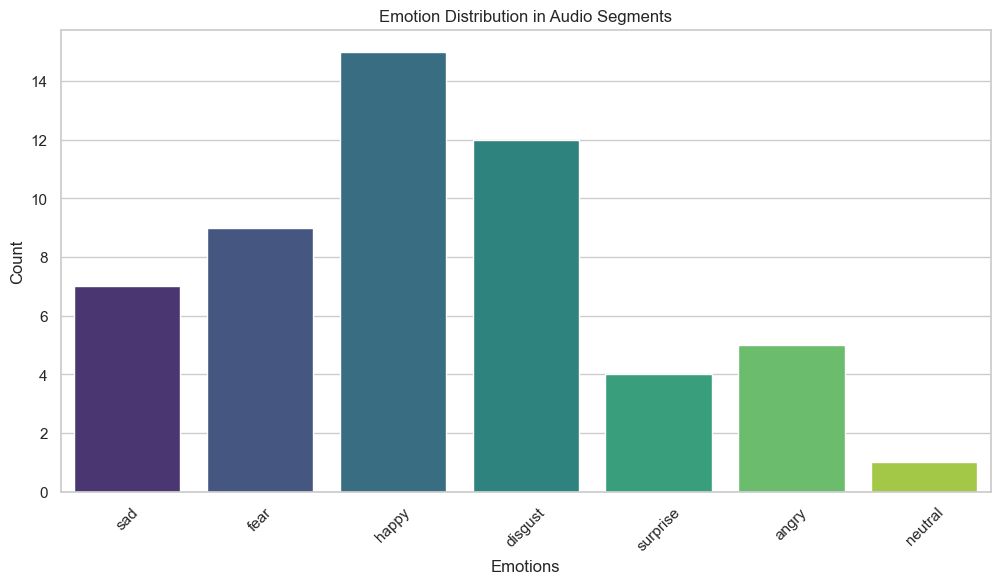

In [43]:
emos = [emotion['emotions'][0] for emotion in chunks_emotion]
#plotting the emotions
import matplotlib.pyplot as plt
import seaborn as sns   
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=emos, palette="viridis")
plt.title('Emotion Distribution in Audio Segments')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
filenames = emodb['filename'].to_list()
for filename in filenames:
    result = processor.process_file(file_path)
    print(result)

{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable